## Assignment 2: Set up the work for data-driven inference based on CitiBike data. You should, even more than usual, work in groups for this!

### I developed an example [here](https://github.com/fedhere/PUI2016_fb55/blob/master/HW3_fb55/citibikes_gender.ipynb)

  
Work on [compute](https://github.com/fedhere/PUI2016_fb55/blob/master/computationalResources.md). 
Choose a citibikes [dataset within the CUSP data facility (DF)](https://datahub.cusp.nyu.edu/dataset).


### GRADING: 

Your notebook must display
- the complete formulation of the hypothesis to be tested
- the data tables for the unreducted datasets (first few columns)
- the data tables for the reducted datasets (first few columns)
- the plots for each dataframe, with usual rules for plotting applying: visible and readable axes, title, legend, caption. 


1. Fire off a Jupyter notebook with Jupyter Hub --[here](https://datahub.cusp.nyu.edu/documents/guides/Jupyter_Notebook_from_your_browser_Mac.pdf) for Mac and Linux and [here](https://datahub.cusp.nyu.edu/documents/guides/Jupyter_Notebook_from_your_browser_Windows.pdf) for Windows--
and switch to the Kernel PUI2016_Python2 or PUI2016_Python3 from the Jupyter dropdown menu under Kernels -> Change Kernel.

   Write a Jupyter Notebook on compute. This will require you to use the JupyterHub ([instructions here](https://datahub.cusp.nyu.edu/documents/guides/Jupyter_Notebook_from_your_browser_Mac.pdf) ). Write a notebook that:

2. States the question you want to ask, and formulates the Null and Alternative hypothesis (remember the confidence level!)


## The Question
Does the trip duration vary with gender on citibike trips?

Null hypothesis: The mean trip duration among males is the same as the mean duration among females for 2017 January - July (latest on cusp DF).

Alternative hypothesis: The mean trip duration is not the same among males and females (in the same timeframe).

Confidence level: 5%.

3. Use pandas to read in the CitiBike files, either from the DF, or locally, but you must be able to download them on the spot (so the TA can reproduce your work). 


In [13]:
import glob
import zipfile

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns

%matplotlib inline


# lightly adapted from something that i wrote: 
# https://github.com/thedataincubator/practical-ml/blob/master/anomaly/anomaly1.ipynb
DIR = "/gws/open/Student/citibike/"
data_2017 = glob.glob(DIR + "*2017*")
print data_2017
fs = [open(fname) for fname in data_2017]
zfs = [zipfile.ZipFile(f) for f in fs]

# NOTE: I should do more and better cleaning.
# But I only care about tripduration and gender for this notebook.
def parse_csv(zf):
    df = pd.read_csv(zf.open(zf.namelist()[0]))
    df.columns = df.columns.str.lower()
    if "trip duration" in df:
        df["tripduration"] = df["trip duration"]
        del df["trip duration"]
    return df

dfs = pd.concat(parse_csv(zf) for zf in zfs)
[zf.close() for zf in zfs]
[f.close() for f in fs]
df = dfs

['/gws/open/Student/citibike/201701-citibike-tripdata.csv.zip', '/gws/open/Student/citibike/201702-citibike-tripdata.csv.zip', '/gws/open/Student/citibike/201703-citibike-tripdata.csv.zip', '/gws/open/Student/citibike/201704-citibike-tripdata.csv.zip', '/gws/open/Student/citibike/201705-citibike-tripdata.csv.zip', '/gws/open/Student/citibike/201706-citibike-tripdata.csv.zip', '/gws/open/Student/citibike/201707-citibike-tripdata.csv.zip']


3. Display the top few rows of the DF in your notebook. This table __must be rendered__.

In [14]:
print df[df["gender"] == 0].size / float(df.size)
df.head()

0.105626114013


,bike id,bikeid,birth year,end station id,end station latitude,end station longitude,end station name,gender,start station id,start station latitude,start station longitude,start station name,start time,starttime,stop time,stoptime,tripduration,user type,usertype
0,25542.0,NaN,1965.0,3165,40.775794,-73.976206,Central Park West & W 72 St,2,3226,40.782750,-73.971370,W 82 St & Central Park West,2017-01-01 00:00:21,NaN,2017-01-01 00:11:41,NaN,680,Subscriber,NaN
1,21136.0,NaN,1987.0,498,40.748549,-73.988084,Broadway & W 32 St,2,3263,40.729236,-73.990868,Cooper Square & E 7 St,2017-01-01 00:00:45,NaN,2017-01-01 00:22:08,NaN,1282,Subscriber,NaN
2,18147.0,NaN,NaN,3152,40.768737,-73.961199,3 Ave & E 71 St,0,3143,40.776829,-73.963888,5 Ave & E 78 St,2017-01-01 00:00:57,NaN,2017-01-01 00:11:46,NaN,648,Customer,NaN
3,21211.0,NaN,NaN,3152,40.768737,-73.961199,3 Ave & E 71 St,0,3143,40.776829,-73.963888,5 Ave & E 78 St,2017-01-01 00:01:10,NaN,2017-01-01 00:11:42,NaN,631,Customer,NaN
4,26819.0,NaN,NaN,3152,40.768737,-73.961199,3 Ave & E 71 St,0,3143,40.776829,-73.963888,5 Ave & E 78 St,2017-01-01 00:01:25,NaN,2017-01-01 00:11:47,NaN,621,Customer,NaN


5. Display the reducted dataframe. This table __must be rendered__.

In [15]:
# thanks for the quantile tip, matt
reducted = df[["gender", "tripduration"]]
q = reducted[reducted["gender"] != 0]["tripduration"].quantile(.99) # per citibike docs
reducted = reducted[(reducted["gender"] != 0) & (reducted["tripduration"] < q)]
reducted.head()

,gender,tripduration
0,2,680
1,2,1282
5,1,666
6,1,559
7,2,826


6. Plot your data distributions.

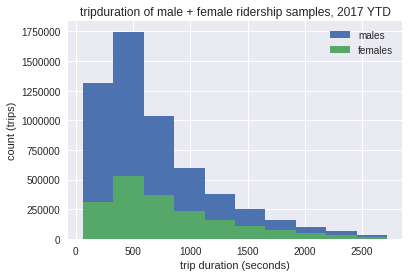

In [16]:
males = reducted[reducted["gender"] == 1]["tripduration"]
females = reducted[reducted["gender"] == 2]["tripduration"]
ax = males.hist(label="males")
females.hist(ax=ax, label="females")
ax.legend()
ax.set_title("tripduration of male + female ridership samples, 2017 YTD")
ax.set_xlabel("trip duration (seconds)")
ax.set_ylabel("count (trips)")

#### Caption
These are raw counts, not normalized, but we can still see that the distributions are quite similar (incl. a similar looking mean). From this plot I would **not** expect to reject the null hypothesis... but, as we'll see, the plot is just not granular enough.

### New stuff for HW7... Mann-Whitney U-test

Small pieces of feedback incorporated above (see commit history). Full-fledged response [here](CitibikeReview_mas1300.md)

I would **initially** assume these are Poisson distributed - they're counts of seconds in each trip. Given our mean is ~700 (for the males), this implies we could basically use the normal distribution. However, as we can see from the KS test, this does not work well.

In [17]:
print "males count: {}".format(len(males))
print "females count: {}".format(len(females))
print "proportion of unreported gender rides: {}".format(df[df["gender"] == 0].size / float(df.size))

males count: 5690786
females count: 1881186
proportion of unreported gender rides: 0.105626114013


In [18]:
m_cdf = lambda x: scipy.stats.norm.cdf(x, loc=males.mean(), scale=males.std(ddof=1))
f_cdf = lambda x: scipy.stats.norm.cdf(x, loc=females.mean(), scale=females.std(ddof=1))
print "KS test on males: {}".format(scipy.stats.kstest(males, m_cdf))
print "KS test on females: {}".format(scipy.stats.kstest(females, f_cdf))

KS test on males: KstestResult(statistic=0.12907128540515694, pvalue=0.0)
KS test on females: KstestResult(statistic=0.11535592062804156, pvalue=0.0)


With this in mind, I'll still run the Z/T tests...

In [19]:
mu_m = males.mean()
mu_f = females.mean()
sesq_m = males.var(ddof=1) / float(len(males))
sesq_f = females.var(ddof=1) / float(len(females))

print "males mean: {}".format(mu_m)
print "females mean: {}".format(mu_f)
z = (mu_m - mu_f) / np.sqrt(sesq_m + sesq_f)
print "z score: {}".format(z)
print "p-value from t-test: {}".format(2 * scipy.stats.t.cdf(z, len(males) + len(females) - 2))
print "p-value from z-test: {}".format(2 * scipy.stats.norm.cdf(z))

males mean: 701.243491497
females mean: 805.868210799
z score: -236.578334605
p-value from t-test: 0.0
p-value from z-test: 0.0


And we see that using sample mean and variance estimates, we get p-values of 0.0 in either case (i.e. reject the null from above).

### Now let's use mann-whitney

In [20]:
scipy.stats.mannwhitneyu(males, females, alternative="two-sided")

MannwhitneyuResult(statistic=4670687165540.0, pvalue=0.0)

So again, we reject the null and conclude that these are two different populations.

### Conclusion: we reject the null hypothesis and accept the alternative that average trip duration is not the same among males and females.

### Other plots for paper

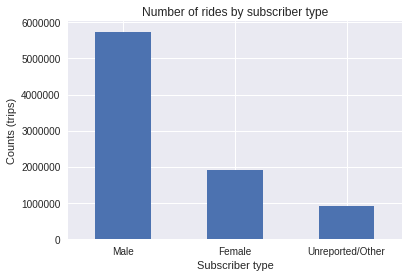

In [21]:
ax = df["gender"].value_counts().plot(kind='bar')
ax.set_title("Number of rides by subscriber type")
ax.set_ylabel("Counts (trips)")
ax.set_xlabel("Subscriber type")
ax.set_xticklabels(["Male", "Female", "Unreported/Other"], rotation=0)

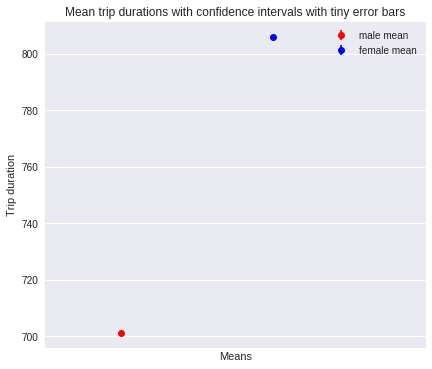

In [22]:
# 95 % interval
ci_width = scipy.stats.norm.isf(.025)

fig=plt.figure(figsize=(15,6))
ax1=fig.add_subplot(121)
ax1.set_xticks([])
ax1.errorbar(.1, mu_m, ci_width * sesq_m, fmt='o', c='r', label='male mean')
ax1.errorbar(.3, mu_f, ci_width * sesq_f, fmt='o', c='b', label='female mean')

ax1.set_xlim(0, .5)
ax1.legend()
ax1.set_ylabel("Trip duration")
ax1.set_xlabel("Means")
ax1.set_title("Mean trip durations with confidence intervals with tiny error bars")

In [23]:
[mu_m - ci_width * sesq_m, mu_m + ci_width * sesq_m]

[701.15823417842387, 701.32874881478654]

In [24]:
[mu_f - ci_width * sesq_f, mu_f + ci_width * sesq_f]

[805.57014345441655, 806.16627814344781]